**Core Features**

  **Price Prediction: Build a machine learning model to predict car prices based on the given features.**
  
  **Key Features Identification: Determine which factors have the most significant influence on car prices. "**
<!----------------------------------------------------------- -->
Feature Impact:

  1. Identify which features (e.g., mileage, engine volume, year, condition) contribute the most to the variation in car prices.
  
  Understand the correlation between these features and car prices. For example:
    *   How does mileage affect price? (Negative correlation likely)
    *   Does a newer production year lead to higher prices?



2. Trend Analysis:
  
  1. Price Trends by Year: Examine how car
  prices vary based on the year of production.

  2. Impact of Condition: Analyze the price difference between new, used, and damaged cars.

  3. Effect of Fuel Type: Determine whether cars running on gasoline, diesel, or electric fuel types command higher prices.

3. Segment Analysis:

  1. Investigate the price differences between car segments (e.g., SUV vs. Sedan vs. Hatchback).
  2. Which segments are more popular or valuable in the Belarus market?


4. Market Dynamics:

  1. Regional Trends (if regional data is available): Understand how prices differ across locations within Belarus.

  2. Identify popular makes and models with the highest resale value.
  
5. Optimal Selling Strategy:

  1. Recommend optimal pricing for sellers based on key car attributes.

  2. Suggest ideal car features buyers should prioritize for their budget.

6. Distribution of Features:

  1. Explore the distribution of key features like mileage, engine volume, and year. For example:
    What is the most common mileage range?
    Are most cars older or relatively new?

7. Anomalies and Outliers:

  1. Identify any anomalies in pricing (e.g., unusually high or low prices for specific cars).
  2. Examine if certain combinations of features lead to unexpected prices.

In [73]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost

In [74]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression ,Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,make_scorer
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
url='https://raw.githubusercontent.com/SUKHMAN-SINGH-1612/Data-Science-Projects/main/Belarus%20Car%20Price%20Prediction/cars.csv'
df= pd.read_csv(url)

df.head()


,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B


In [75]:

# Data pre processing:
# ---------------------understanding the data -----------------------
df.info()


df.describe()

# to identify null values
print('-'*130)
print(df.isnull().sum())
print('-'*130)

# calculating percentage of missing values for each feature
miss_perc=(df.isnull().sum()/len(df))*100
print(miss_perc)
# since the missing percentge is less its safe to impute


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56244 entries, 0 to 56243
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 56244 non-null  object 
 1   model                56244 non-null  object 
 2   priceUSD             56244 non-null  int64  
 3   year                 56244 non-null  int64  
 4   condition            56244 non-null  object 
 5   mileage(kilometers)  56244 non-null  float64
 6   fuel_type            56244 non-null  object 
 7   volume(cm3)          56197 non-null  float64
 8   color                56244 non-null  object 
 9   transmission         56244 non-null  object 
 10  drive_unit           54339 non-null  object 
 11  segment              50953 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 5.1+ MB
---------------------------------------------------------------------------------------------------------------------------------

In [76]:

# <---------------------Handling the missing values in the data ----------------------->


numerical_feat=['volume(cm3)']
categoric_feat=['drive_unit','segment']
# for dealing with imputation of numerical data we will use median
num_imp=SimpleImputer(strategy='median')
# for dealing with imputation of categorial data we will use the most frequent strategy
cat_imp=SimpleImputer(strategy='most_frequent')
df[numerical_feat]=num_imp.fit_transform(df[numerical_feat])
df[categoric_feat]=cat_imp.fit_transform(df[categoric_feat])

# no we check our null values again
# print(df.isnull().sum())

#  <---------------------Encoding Categorial features  ----------------------->

# here i checked the unique values in ech column to determine the cardinality
for col in ['make', 'model', 'condition', 'fuel_type', 'color', 'transmission', 'drive_unit', 'segment']:
    print(f"{col}: {df[col].nunique()} unique values")


# frequency encoding for make and model and One hot encoding for others

# one hot encoding
low_cardinality_features = ['fuel_type', 'condition','color', 'transmission', 'drive_unit', 'segment']
df=pd.get_dummies(df,columns=low_cardinality_features,drop_first=True)

high_car=['make','model']

# frequency encoding
for feature in high_car:
    freq_encoding = df[feature].value_counts().to_dict()  # Getting the frequency of each category
    df[feature] = df[feature].map(freq_encoding)


print(df.head())

make: 96 unique values
model: 1034 unique values
condition: 3 unique values
fuel_type: 3 unique values
color: 13 unique values
transmission: 2 unique values
drive_unit: 4 unique values
segment: 9 unique values
   make  model  priceUSD  year  mileage(kilometers)  volume(cm3)  \
0  2006     25      5500  2008             162000.0       1500.0   
1  2006     25      5350  2009             120000.0       1300.0   
2  2006     25      7000  2009              61000.0       1500.0   
3  2006     25      3300  2003             265000.0       1400.0   
4  2006     25      5200  2008              97183.0       1400.0   

   fuel_type_electrocar  fuel_type_petrol  condition_with damage  \
0                 False              True                  False   
1                 False              True                  False   
2                 False              True                  False   
3                 False             False                  False   
4                 False             False

In [77]:

# <-----------------------Feature scaling------------------------->

df['car_age']=2025-df['year']

num_feat=['mileage(kilometers)','volume(cm3)','car_age']

scaler=StandardScaler()

df[num_feat]=scaler.fit_transform(df[num_feat])
data=df
print(df.info())

# <========================DATA PRE PROCESSING FINISHED ============================================>


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56244 entries, 0 to 56243
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   make                                   56244 non-null  int64  
 1   model                                  56244 non-null  int64  
 2   priceUSD                               56244 non-null  int64  
 3   year                                   56244 non-null  int64  
 4   mileage(kilometers)                    56244 non-null  float64
 5   volume(cm3)                            56244 non-null  float64
 6   fuel_type_electrocar                   56244 non-null  bool   
 7   fuel_type_petrol                       56244 non-null  bool   
 8   condition_with damage                  56244 non-null  bool   
 9   condition_with mileage                 56244 non-null  bool   
 10  color_blue                             56244 non-null  bool   
 11  co

In [78]:
# eVALUATION FOR DIFFER



X=df.drop('priceUSD',axis=1).values
y=df['priceUSD'].values
# print(X.shape,y.shape)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# testing if the sizes are correct
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

# Verify that your features in X_train and X_test are properly scaled:
print(X_train[:5])  # First 5 rows of the training feature set


# here we check the distribution of y_train adn y_test
print("Train target mean:", y_train.mean())
print("Test target mean:", y_test.mean())


Training set size: (44995, 34) (44995,)
Testing set size: (11249, 34) (11249,)
[[2233 45 1998 0.4224069157636059 -0.10927193404729829 False True False
  True False False False False False False False False False True False
  False False True False False False False True False False False False
  False 0.6697842294904405]
 [374 121 2012 -0.5497892178518449 -0.10927193404729829 False True False
  True True False False False False False False False False False False
  False False False False False False False False False False True False
  False -1.0492359165596001]
 [949 290 2010 -0.27846693337378003 0.307917347985836 False True False
  True False False False False False False False False False False False
  False False True False False False False True False False False False
  False -0.8036616099810229]
 [1196 131 2013 -0.3990172354254104 -0.5264612160804325 False True False
  True False False False False False False True False False False False
  False True True False False False True

In [79]:
# <-------------------------Model Train ANd  Test------------------------->

# Linear Regression
reg=LinearRegression()
reg.fit(X_train,y_train)

# prediction
y_predict=reg.predict(X_test)

print("Linear Regression Results:")
print("MAE: ",mean_absolute_error(y_test,y_predict))
print("MSE: ",mean_squared_error(y_test,y_predict))
print("R-squared: ",r2_score(y_test,y_predict))



Linear Regression Results:
MAE:  2821.932505371226
MSE:  30323770.31321749
R-squared:  0.5375152955603885


In [80]:
# Ridge Regression with GridSearchCV

# selecting  the best param
param_grid={'alpha':[0.1,1,10.0,100,1000]}
ridgecv=GridSearchCV(Ridge(),param_grid,scoring='neg_mean_squared_error',cv=5)

ridgecv.fit(X_train,y_train)


print("Best alpha:", ridgecv.best_params_)
# predictions:

ridge=Ridge(alpha=ridgecv.best_params_['alpha'])
ridge.fit(X_train,y_train)
y_preds=ridge.predict(X_test)

print("Ridge Regression Results:")
print("MAE: ",mean_absolute_error(y_test,y_preds))
print("MSE: ",mean_squared_error(y_test,y_preds))
print("R-squared: ",r2_score(y_test,y_preds))



Best alpha: {'alpha': 0.1}
Ridge Regression Results:
MAE:  2821.940549878618
MSE:  30322636.279663682
R-squared:  0.5375325913375144


In [81]:

# selecting the best params
param_distributions = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=3,
    random_state=42,
    n_jobs=-1
)

X_train_df = pd.DataFrame(X_train)
y_train_series = pd.Series(y_train)

X_sample = X_train_df.sample(frac=0.3, random_state=42)
y_sample = y_train_series.loc[X_sample.index]

rf_random.fit(X_sample, y_sample)
print("Best Parameters:", rf_random.best_params_)

rf = rf_random.best_estimator_
# predict
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print("MAE: ", mean_absolute_error(y_test, y_pred_rf))
print("MSE: ", mean_squared_error(y_test, y_pred_rf))
print("R-squared: ", r2_score(y_test, y_pred_rf))

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Random Forest Results:
MAE:  1230.364371307644
MSE:  8430419.5192527
R-squared:  0.8714229780996576


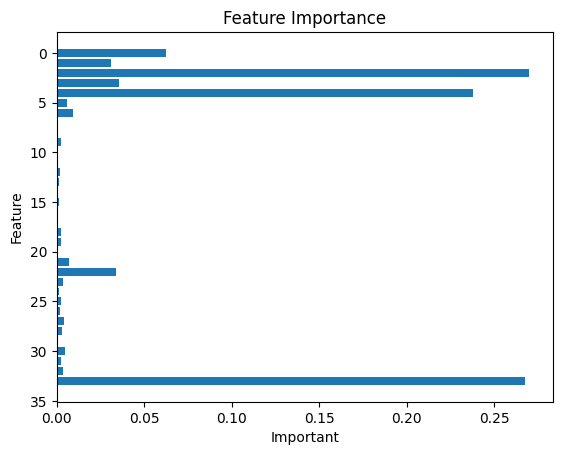

In [82]:
# Checking which features contrubute most to the model

features_imp=rf.feature_importances_
plt.barh(X_train_df.columns,features_imp)
plt.xlabel('Important')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


Observaions:


*   Importance Scores (X-axis):
      1. The longer the bar, the more important that feature was in helping the model make accurate predictions. Importance is calculated based on how much the feature reduces uncertainty (like splitting nodes in decision trees).



Key Insights:
*  One feature (positioned around 35) is highly important, contributing the most to predictions.

*   Several other features (positions 0 to 5) are also significant but less influential than the top one.

*   Many features (e.g., above 30) have minimal or no importance (small bars).






In [83]:
# Gradient Boosting Algorithm

xg= XGBRegressor(tree_method="hist", device="cuda", random_state=42)
xg.fit(X_train,y_train)

# predictions:
y_pred_xg=xg.predict(X_test)

print("XGBoost Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_xg))
print("MSE:", mean_squared_error(y_test, y_pred_xg))
print("R-squared:", r2_score(y_test, y_pred_xg))


XGBoost Results:
MAE: 1078.891845703125
MSE: 6363143.5
R-squared: 0.9029521346092224


1. MAE (1078.89): The model predicts car prices with an average error of about $1,079. This is significantly better than Random Forest and Linear Regression.

2. MSE (6,363,143.5): A marked improvement over previous models, reflecting smaller prediction errors.

3. R² (0.9029): The model explains ~90.3% of the variance in car prices, which is excellent.

hence XGboost is the best performing model based on MAE, MSE, R^2

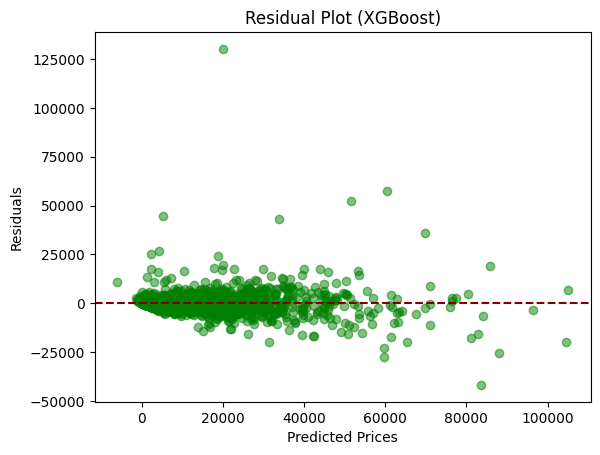

In [84]:
# <---------------Residual Analysis---------------->

resid=y_test-y_pred_xg
plt.scatter(y_pred_xg,resid,alpha=0.5,color='green')
plt.axhline(0,color='maroon',linestyle='--')
plt.title("Residual Plot (XGBoost)")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.show()

Key Observations from Residual Analysis:

1. Centering Around Zero (Good Sign): Residuals are mostly centered around 0, showing unbiased predictions and a good overall fit.

2. Residual Spread (Potential Issue):
    
      Predictions for lower prices (0–40,000) are accurate with tightly clustered residuals.

      For higher prices (above ~50,000), residuals spread more, indicating the model struggles with expensive cars.

3. Outliers:
A few large residuals (above 25,000 or below -25,000) may suggest:
    
      Outliers in data: Cars with unusual features or errors.

      Model limitations: Important influencing features might be missing.

>>The model performs well for the majority of the dataset, especially for cars in the lower and mid-price range.However, predictions for higher-priced cars might need improvement.

In [85]:
# Addressing the issues with High price of cars

outliers = X_test[(resid > 25000) | (resid < -25000)]
print(outliers)


[[175 1 2019 -0.7612568756135769 -0.10927193404729829 False True False
  True False False False False False False False False False False False
  True False False False True False False True False False False False
  False -1.9087459895846204]
 [3713 768 2003 0.24485220731546814 0.09619378735402033 False False False
  True False False False False False False False False False False False
  False True True False False False False True False False False False
  False 0.055848463043997404]
 [55 8 1933 -0.7612880255624275 0.307917347985836 False True False True
  False False False False False False False False False False False False
  True True False False False False True False False False False False
  8.6509491932942]
 [4013 537 2019 -0.7381809935050891 0.9337012710355374 False False False
  True False False False False False False False False False False False
  False False False False False False False False False False True False
  False -1.9087459895846204]
 [4013 563 2018 -0.65849

In [86]:

xgb_model = XGBRegressor(random_state=42)


param_grid = {
    'eta': [0.01, 0.1],
    'max_depth': [3, 7],
    'min_child_weight': [1, 3],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'gamma': [0, 1]
}


scorer = make_scorer(mean_squared_error, greater_is_better=False)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    scoring=scorer,
    n_iter=10,
    cv=3,
    verbose=1,
    n_jobs=-1
)


random_search.fit(X_train, y_train)


best_params = random_search.best_params_
print("Best Parameters:", best_params)

best_model = XGBRegressor(random_state=42, **best_params)
best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)




Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 1.0, 'min_child_weight': 3, 'max_depth': 7, 'gamma': 1, 'eta': 0.1, 'colsample_bytree': 1.0}
Mean Squared Error: 6900234.0


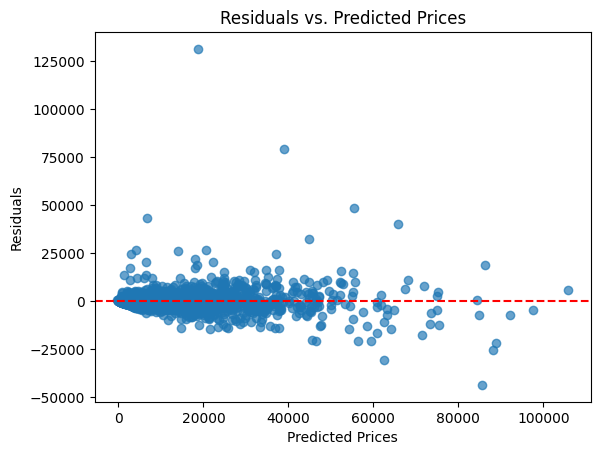

In [87]:


residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.68)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Predicted Prices")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.show()


In [88]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error:", mape)

Mean Absolute Percentage Error: 24.982840975963903



### **Choice Of model With Reason**
```
#Random Forest was chosen due to its robustness, ability to handle non-linear relationships, and effectiveness in capturing feature interactions.

Linear Regression was used as a baseline because it’s simple and interpretable, providing a point of comparison for more complex models.

XGBoost was included because it often delivers state-of-the-art performance in tabular data due to its efficient gradient boosting algorithm.
```




### **Which Models were Tuned and How?**
```
# Random Forest:
The number of trees (n_estimators) was optimized to balance computation time and performance.
max_depth and min_samples_split were adjusted to prevent overfitting.
XGBoost:
Learning rate, max_depth, and subsample were tuned using Grid Search to improve accuracy.
Cross-validation was employed to validate the model performance and avoid overfitting.

```



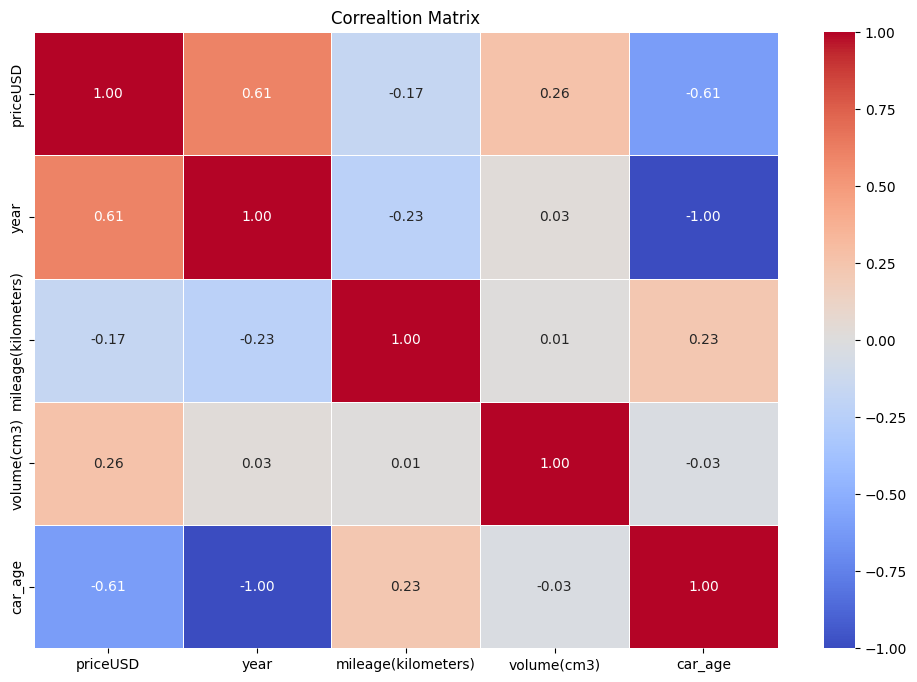

In [102]:
nume_df = df[['priceUSD', 'year', 'mileage(kilometers)', 'volume(cm3)','car_age']]
corr_mat=nume_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_mat,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Correaltion Matrix')
plt.show()

1. **Diagonal Elements (1.00):**

    Variables are perfectly correlated with themselves, as expected.

2. **priceUSD Correlations:**

    year (0.61): Strong positive correlation. Newer cars tend to have higher prices.

    mileage(kilometers) (-0.17): Weak negative correlation. Cars with higher mileage tend to have slightly lower prices.

    volume(cm3) (0.26): Weak positive correlation. Larger engine volume slightly increases car prices.

    car_age (-0.61): Strong negative correlation. Older cars (higher car_age) tend to have lower prices.

3. **year Correlations:**

    mileage(kilometers) (-0.23): Weak negative correlation. Newer cars generally have less mileage.

    volume(cm3) (0.03): Almost no relationship between year and engine volume.

    car_age (-1.00): Perfect negative correlation, as car_age is derived from year.

4. **mileage(kilometers) Correlations:**

    volume(cm3) (0.01): Negligible correlation, suggesting mileage and engine volume are unrelated.

    car_age (0.23): Weak positive correlation. Older cars tend to have slightly higher mileage.

5. **volume(cm3) Correlations:**

    car_age (-0.03): Almost no relationship between engine volume and car age.

6. **car_age Correlations:**

    priceUSD (-0.61): Older cars are less expensive.

    year (-1.00): Perfect negative correlation due to derivation.

    mileage(kilometers) (0.23): Older cars have slightly higher mileage.

    volume(cm3) (-0.03): Almost no effect on car age.

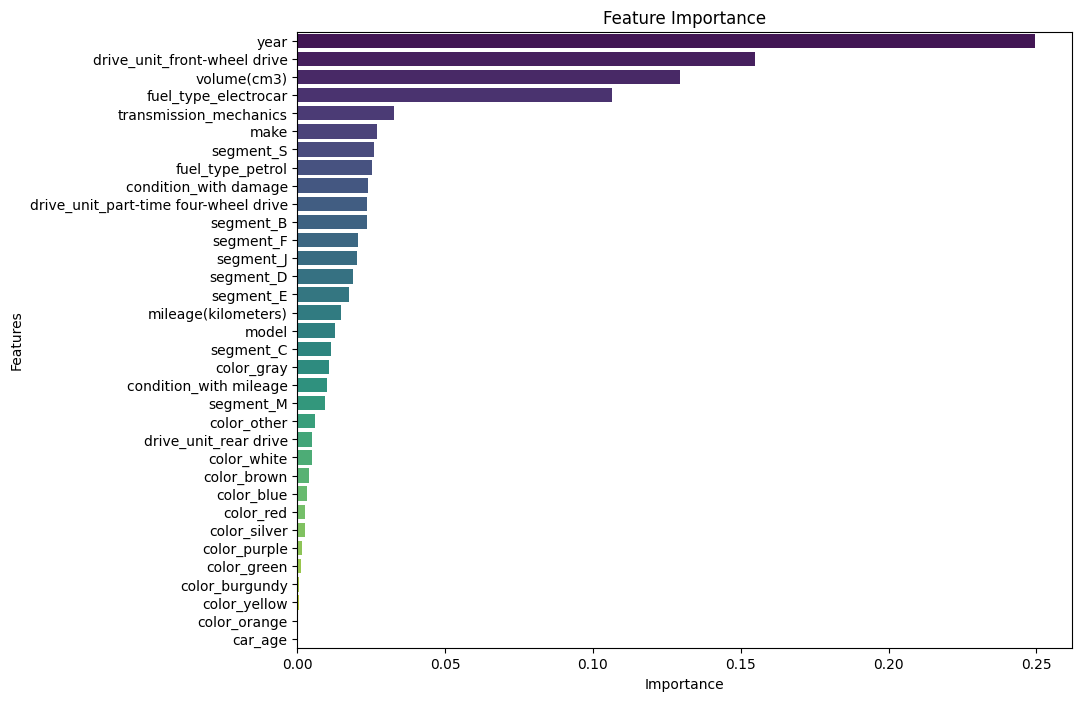

In [100]:
# Analyzing which feature is important in determing the price

#  here we have the Feature and Importance column w.r.t price

feature_importances = pd.DataFrame({
    'Feature': df.drop('priceUSD', axis=1).columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis',hue='Feature', dodge=False)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


***Car age has no importance***

The "year" feature already encapsulates information about the car's age, making "car age" redundant. For instance, "year" directly indicates the production year, which is a better predictor of price.

***Most Important Features***

1. Year: Reflects the car's production year, directly impacting depreciation and perceived value.

2. Drive Unit: Indicates whether the car is front-wheel, rear-wheel, or all-wheel drive, which significantly affects market demand.

3. Engine Volume (cm³): Larger engine capacities are often associated with higher prices due to performance considerations.